In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [34]:
N = 3
h = 2
# discretisation
A2 = 1/h**2*(-2*np.eye(N) +\
np.eye(N, k=-1) +\
np.eye(N, k=1))
A2f = 1/h**2*np.vstack(( [1,0], np.zeros((N-2,2)), [0,1] ))
B1 = np.hstack(( [[-1], [0]], np.zeros((2,N-2)), [[0], [1]] ))
B0 = np.array([2, 0])

print(A2@(np.array([1,2,3]).T))

A2, A2f, B1, B0
   

[ 0.  0. -1.]


(array([[-0.5 ,  0.25,  0.  ],
        [ 0.25, -0.5 ,  0.25],
        [ 0.  ,  0.25, -0.5 ]]),
 array([[0.25, 0.  ],
        [0.  , 0.  ],
        [0.  , 0.25]]),
 array([[-1.,  0.,  0.],
        [ 0.,  0.,  1.]]),
 array([2, 0]))

In [35]:
def diffmodel_a(t, c, k, h, D, cb):
    N = len(c)
    a = (k*h)/(2*D)
    # discretisation
    A2 = 1/h**2*(-2*np.eye(N) +\
    np.eye(N, k=-1) +\
    np.eye(N, k=1))
    A2f = 1/h**2*np.vstack(( [1,0], np.zeros((N-2,2)), [0,1] ))
    B1 = np.hstack(( [[(1-a)/(1+a)], [0]], np.zeros((2,N-2)), [[0], [1]] ))
    B0 = np.array([2*a/(1+a), 0])
    # assembly
    dcdt=D*(A2@c + A2f@(B1@c + B0*cb))
    return dcdt

In [36]:
def diffmodel(t, c, h, D, cb):
    N = len(c)
    # discretisation
    A2 = 1/h**2*(-2*np.eye(N) +\
    np.eye(N, k=-1) +\
    np.eye(N, k=1))
    A2f = 1/h**2*np.vstack(( [1,0], np.zeros((N-2,2)), [0,1] ))
    B1 = np.hstack(( [[-1], [0]], np.zeros((2,N-2)), [[0], [1]] ))
    B0 = np.array([2, 0])
    print(B1@c)
    # assembly
    dcdt=D*(A2@c + A2f@(B1@c + B0*cb))
    return dcdt

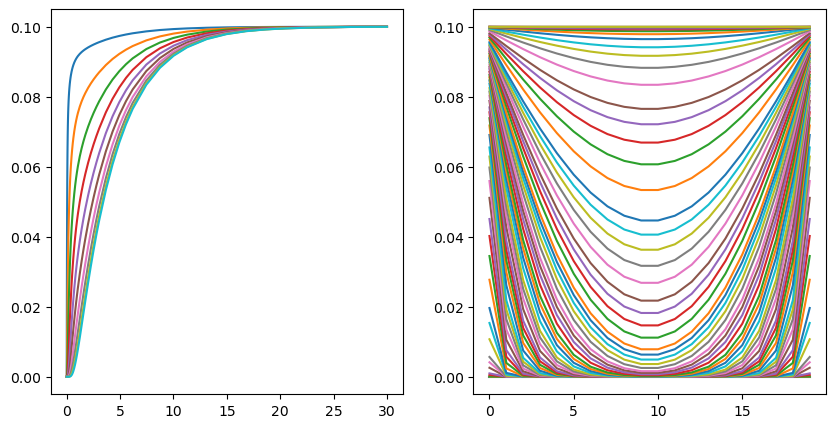

In [43]:
# parameters
D = 1e-10
L = 30e-6
k = 1e-2
cb = 0.1
# mesh
N = 10
h = L/N
# init
cinit = np.zeros(N)
tspan=[0, 30]
# solve
sol = solve_ivp(lambda t, c: diffmodel_a(t,c,k,h,D,cb), tspan, cinit, method = 'BDF')
t = sol.t
c = sol.y.T
cprofile = np.hstack(( c, c[:,-1::-1] )).T
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs = axs.ravel()
axs[0].plot(t, c)
axs[1].plot(cprofile)
plt.show()

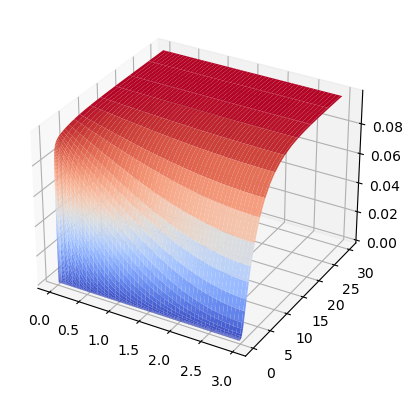

In [38]:
z = np.arange(h/2, L, h) #start, stop, step
T, Z = np.meshgrid(t, z)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Z, T, c.T, cmap='coolwarm')

In [39]:
import plotly.graph_objects as go

z = np.arange(h/2, L, h)
T, Z = np.meshgrid(t, z)

# Create a 3D surface plot
fig = go.Figure(data=[go.Surface(z=c.T, x=Z, y=T)])

# Update layout if needed
fig.update_layout(title='3D Surface Plot', autosize=False,
                  width=400, height=400)

# Show the plot
fig.show()